In [1]:
import pandas as pd
import numpy as np

In [2]:
# Disable row and column truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Read dataset
data = pd.read_csv('final_dataset.csv')
data.shape

(2493, 76)

In [4]:
# Check first few rows
data.head()

,business_id,city,latitude,longitude,name,postal_code,review_count,star_rating,state,isBankrupt,county,isChain,neighborhood,forGroups,noiseLevel,hasWiFi,attire,reservations,outdoorSeating,acceptCreditCard,priceRange,delivery,goodForKids,driveThru,happyHour,best_for_breakfast,best_for_brunch,best_for_dessert,best_for_dinner,best_for_latenight,best_for_lunch,parking_garage,parking_lot,parking_street,parking_valet,parking_validated,American,Chinese,EastAsia,European,Mexican,MiddleEast,SouthEastAsia,Other_Ethnic,Fast_Food,Alcohol,Beverage,Bakeries_Desserts,Vegetarian,Coffee_Tea,Seafood,Chicken,Meat,Gluten-Free,Soup,Buffets,Other_Food,cool,funny,stars,useful,review_length,Service_Quality,Breakfast_Description,Order_Wait_Time,Dining_Experience,Coffee_Pastry_PortionSize,Price_Service,Asian_Food_Description,Gluten_Free_Food,Mexican_Food_Description,Fast_Food_Description,polarity,subjectivity,restaurant_age,clean_text
0,rDMptJYWtnMhpQu_rRXHng,Phoenix,33.607070,-112.064382,McDonald's,85022,10,1.0,AZ,0,Maricopa County,1,13,True,loud,free,casual,False,False,True,1.0,False,True,True,NaN,True,False,False,False,False,True,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.909091,1.090909,1.454545,43.363636,0.000000,0.000000,0.545455,0.272727,0.090909,0.0,0.0,0.0,0.000000,0.090909,-0.161032,0.494729,6.575342,speed delivery food order terrible take minute...
1,1WBkAuQg81kokZIPMpn9Zg,Phoenix,33.607310,-112.063404,Charr An American Burger Bar,85022,232,3.0,AZ,0,Maricopa County,0,13,True,average,free,casual,False,True,True,2.0,True,True,False,NaN,False,False,False,True,False,False,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.370690,0.422414,3.155172,1.625000,112.676724,0.047414,0.004310,0.185345,0.612069,0.000000,0.0,0.0,0.0,0.012931,0.137931,0.243730,0.626364,5.526027,place way successful run good customer service...
2,iPa__LOhse-hobC2Xmp-Kw,Phoenix,33.508765,-112.046240,McDonald's,85016,34,3.0,AZ,0,Maricopa County,1,22,True,loud,paid,casual,False,False,True,1.0,False,True,True,NaN,True,False,False,True,True,True,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.264706,0.529412,2.764706,0.705882,103.411765,0.029412,0.000000,0.558824,0.323529,0.000000,0.0,0.0,0.0,0.058824,0.029412,0.037716,0.568482,9.641096,awesome breakfast good store clean clean porti...
3,YhV93k9uiMdr3FlV4FHjwA,Phoenix,33.449967,-112.070223,Caviness Studio,85001,4,5.0,AZ,0,Maricopa County,0,38,NaN,NaN,NaN,NaN,False,NaN,True,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5.000000,0.250000,92.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.391310,0.685331,1.501370,custom shirt order design silk screen print te...
4,QkG3KUXwqZBW18A9k1xqCA,Phoenix,33.478735,-112.221379,Red Lobster,85035,37,2.5,AZ,0,Maricopa County,1,15,True,quiet,no,casual,True,False,True,2.0,False,True,NaN,NaN,False,False,False,True,False,False,False,False,False,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162162,0.324324,2.648649,0.756757,111.918919,0.081081,0.027027,0.459459,0.432432,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.099518,0.652154,5.715068,food good service great waiter think attentive...


In [5]:
# Create a copy of the data
df = data.copy()

# Data Analysis

In [6]:
# Drop unnecessary variables
var_to_drop = ['business_id', 'city', 'latitude', 'longitude', 'name', 'postal_code', 'state', 'county', 'clean_text']
df = df.drop(var_to_drop, axis=1)
df.shape

(2493, 67)

In [7]:
# Check first few rows of data
df.head()

,review_count,star_rating,isBankrupt,isChain,neighborhood,forGroups,noiseLevel,hasWiFi,attire,reservations,outdoorSeating,acceptCreditCard,priceRange,delivery,goodForKids,driveThru,happyHour,best_for_breakfast,best_for_brunch,best_for_dessert,best_for_dinner,best_for_latenight,best_for_lunch,parking_garage,parking_lot,parking_street,parking_valet,parking_validated,American,Chinese,EastAsia,European,Mexican,MiddleEast,SouthEastAsia,Other_Ethnic,Fast_Food,Alcohol,Beverage,Bakeries_Desserts,Vegetarian,Coffee_Tea,Seafood,Chicken,Meat,Gluten-Free,Soup,Buffets,Other_Food,cool,funny,stars,useful,review_length,Service_Quality,Breakfast_Description,Order_Wait_Time,Dining_Experience,Coffee_Pastry_PortionSize,Price_Service,Asian_Food_Description,Gluten_Free_Food,Mexican_Food_Description,Fast_Food_Description,polarity,subjectivity,restaurant_age
0,10,1.0,0,1,13,True,loud,free,casual,False,False,True,1.0,False,True,True,NaN,True,False,False,False,False,True,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.909091,1.090909,1.454545,43.363636,0.000000,0.000000,0.545455,0.272727,0.090909,0.0,0.0,0.0,0.000000,0.090909,-0.161032,0.494729,6.575342
1,232,3.0,0,0,13,True,average,free,casual,False,True,True,2.0,True,True,False,NaN,False,False,False,True,False,False,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.370690,0.422414,3.155172,1.625000,112.676724,0.047414,0.004310,0.185345,0.612069,0.000000,0.0,0.0,0.0,0.012931,0.137931,0.243730,0.626364,5.526027
2,34,3.0,0,1,22,True,loud,paid,casual,False,False,True,1.0,False,True,True,NaN,True,False,False,True,True,True,False,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.264706,0.529412,2.764706,0.705882,103.411765,0.029412,0.000000,0.558824,0.323529,0.000000,0.0,0.0,0.0,0.058824,0.029412,0.037716,0.568482,9.641096
3,4,5.0,0,0,38,NaN,NaN,NaN,NaN,False,NaN,True,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5.000000,0.250000,92.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.391310,0.685331,1.501370
4,37,2.5,0,1,15,True,quiet,no,casual,True,False,True,2.0,False,True,NaN,NaN,False,False,False,True,False,False,False,False,False,False,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.162162,0.324324,2.648649,0.756757,111.918919,0.081081,0.027027,0.459459,0.432432,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.099518,0.652154,5.715068


In [8]:
# Check NA
missing_count = df.isna().sum()
missing_count.sort_values(ascending=False)

happyHour                    2210
driveThru                    1946
MiddleEast                    924
American                      924
Chinese                       924
EastAsia                      924
European                      924
Mexican                       924
SouthEastAsia                 924
Other_Ethnic                  924
Coffee_Tea                    606
Meat                          606
Chicken                       606
Alcohol                       606
Vegetarian                    606
Bakeries_Desserts             606
Beverage                      606
Soup                          606
Fast_Food                     606
Gluten-Free                   606
Seafood                       606
Buffets                       606
Other_Food                    606
noiseLevel                    453
hasWiFi                       423
parking_garage                327
parking_lot                   327
parking_street                327
parking_valet                 327
parking_valida

In [9]:
# Get all variables with missing values
missing_var = missing_count[missing_count > 0].index
missing_var

Index(['forGroups', 'noiseLevel', 'hasWiFi', 'attire', 'reservations',
       'outdoorSeating', 'acceptCreditCard', 'priceRange', 'delivery',
       'goodForKids', 'driveThru', 'happyHour', 'best_for_breakfast',
       'best_for_brunch', 'best_for_dessert', 'best_for_dinner',
       'best_for_latenight', 'best_for_lunch', 'parking_garage', 'parking_lot',
       'parking_street', 'parking_valet', 'parking_validated', 'American',
       'Chinese', 'EastAsia', 'European', 'Mexican', 'MiddleEast',
       'SouthEastAsia', 'Other_Ethnic', 'Fast_Food', 'Alcohol', 'Beverage',
       'Bakeries_Desserts', 'Vegetarian', 'Coffee_Tea', 'Seafood', 'Chicken',
       'Meat', 'Gluten-Free', 'Soup', 'Buffets', 'Other_Food'],
      dtype='object')

In [10]:
# Get convert all missing variables into string
df[missing_var] = df[missing_var].astype(str).replace('nan', np.nan)

In [11]:
# Extract all ethnics and food types variables
ethnics = ['American', 'Chinese', 'EastAsia', 'European', 'Mexican', 'MiddleEast', 'SouthEastAsia', 'Other_Ethnic']
food_types = ['Fast_Food', 'Alcohol', 'Beverage', 'Bakeries_Desserts', 'Vegetarian', 'Coffee_Tea', 
              'Seafood', 'Chicken', 'Meat', 'Gluten-Free', 'Soup', 'Buffets', 'Other_Food']

In [12]:
# Convert all ethnics and food types into boolean
df[ethnics + food_types] = df[ethnics + food_types].replace({'0.0':False, '1.0':True})

In [13]:
# Convert all missing variables into dummies
df = pd.get_dummies(df)
df.shape

(2493, 117)

In [14]:
# Look at first few rows of data
df.head()

,review_count,star_rating,isBankrupt,isChain,neighborhood,cool,funny,stars,useful,review_length,Service_Quality,Breakfast_Description,Order_Wait_Time,Dining_Experience,Coffee_Pastry_PortionSize,Price_Service,Asian_Food_Description,Gluten_Free_Food,Mexican_Food_Description,Fast_Food_Description,polarity,subjectivity,restaurant_age,forGroups_False,forGroups_True,noiseLevel_average,noiseLevel_loud,noiseLevel_quiet,noiseLevel_very_loud,hasWiFi_free,hasWiFi_no,hasWiFi_paid,attire_casual,attire_dressy,attire_formal,reservations_False,reservations_True,outdoorSeating_False,outdoorSeating_True,acceptCreditCard_False,acceptCreditCard_True,priceRange_1.0,priceRange_2.0,priceRange_3.0,priceRange_4.0,delivery_False,delivery_True,goodForKids_False,goodForKids_True,driveThru_False,driveThru_True,happyHour_False,happyHour_True,best_for_breakfast_False,best_for_breakfast_True,best_for_brunch_False,best_for_brunch_True,best_for_dessert_False,best_for_dessert_True,best_for_dinner_False,best_for_dinner_True,best_for_latenight_False,best_for_latenight_True,best_for_lunch_False,best_for_lunch_True,parking_garage_False,parking_garage_True,parking_lot_False,parking_lot_True,parking_street_False,parking_street_True,parking_valet_False,parking_valet_True,parking_validated_False,parking_validated_True,American_False,American_True,Chinese_False,Chinese_True,EastAsia_False,EastAsia_True,European_False,European_True,Mexican_False,Mexican_True,MiddleEast_False,MiddleEast_True,SouthEastAsia_False,SouthEastAsia_True,Other_Ethnic_False,Other_Ethnic_True,Fast_Food_False,Fast_Food_True,Alcohol_False,Alcohol_True,Beverage_False,Beverage_True,Bakeries_Desserts_False,Bakeries_Desserts_True,Vegetarian_False,Vegetarian_True,Coffee_Tea_False,Coffee_Tea_True,Seafood_False,Seafood_True,Chicken_False,Chicken_True,Meat_False,Meat_True,Gluten-Free_False,Gluten-Free_True,Soup_False,Soup_True,Buffets_False,Buffets_True,Other_Food_False,Other_Food_True
0,10,1.0,0,1,13,0.363636,0.909091,1.090909,1.454545,43.363636,0.000000,0.000000,0.545455,0.272727,0.090909,0.0,0.0,0.0,0.000000,0.090909,-0.161032,0.494729,6.575342,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
1,232,3.0,0,0,13,0.370690,0.422414,3.155172,1.625000,112.676724,0.047414,0.004310,0.185345,0.612069,0.000000,0.0,0.0,0.0,0.012931,0.137931,0.243730,0.626364,5.526027,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2,34,3.0,0,1,22,0.264706,0.529412,2.764706,0.705882,103.411765,0.029412,0.000000,0.558824,0.323529,0.000000,0.0,0.0,0.0,0.058824,0.029412,0.037716,0.568482,9.641096,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
3,4,5.0,0,0,38,0.000000,0.000000,5.000000,0.250000,92.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.391310,0.685331,1.501370,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
4,37,2.5,0,1,15,0.162162,0.324324,2.648649,0.756757,111.918919,0.081081,0.027027,0.459459,0.432432,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.099518,0.652154,5.715068,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [15]:
# Extract target name and feature name 
target_name = 'isBankrupt'
feature_name = [x for x in df.columns if x != target_name]

In [16]:
# Separate data into feature and target
y = df[target_name]
X = df[feature_name]

# Principal Component Analysis

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [70]:
# Run PCA
numPC = 5
pca = PCA(numPC).fit(X)

In [71]:
# Compute percent of variance explained by PC
pc = list(np.arange(pca.n_components_)+1)
pve = pca.explained_variance_ratio_

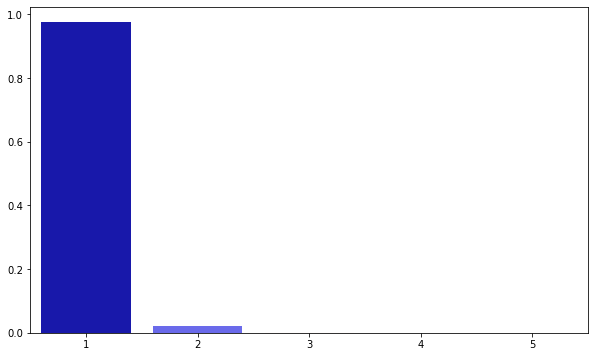

In [82]:
plt.figure(figsize=(10,6))
sns.barplot(pc, pve, palette='seismic');

In [73]:
# Get principal components
prcomp = PCA(numPC).fit_transform(X)

In [79]:
col_name = ['isBankrupt'] + ['PC'+str(i+1) for i in range(numPC)]
PC_df = pd.DataFrame(np.insert(prcomp, 0, y, axis=1), columns=col_name)
PC_df.head()

,isBankrupt,PC1,PC2,PC3,PC4,PC5
0,0.0,-104.623760,-48.276919,-0.324826,-2.049422,-2.853447
1,0.0,119.163183,14.952437,-1.945566,1.337363,-1.845561
2,0.0,-78.943759,11.164683,8.064793,-4.049247,-1.863398
3,0.0,-109.161747,1.006392,24.542744,3.762123,-0.642705
4,0.0,-75.767546,19.490690,1.132399,0.292834,-0.120663


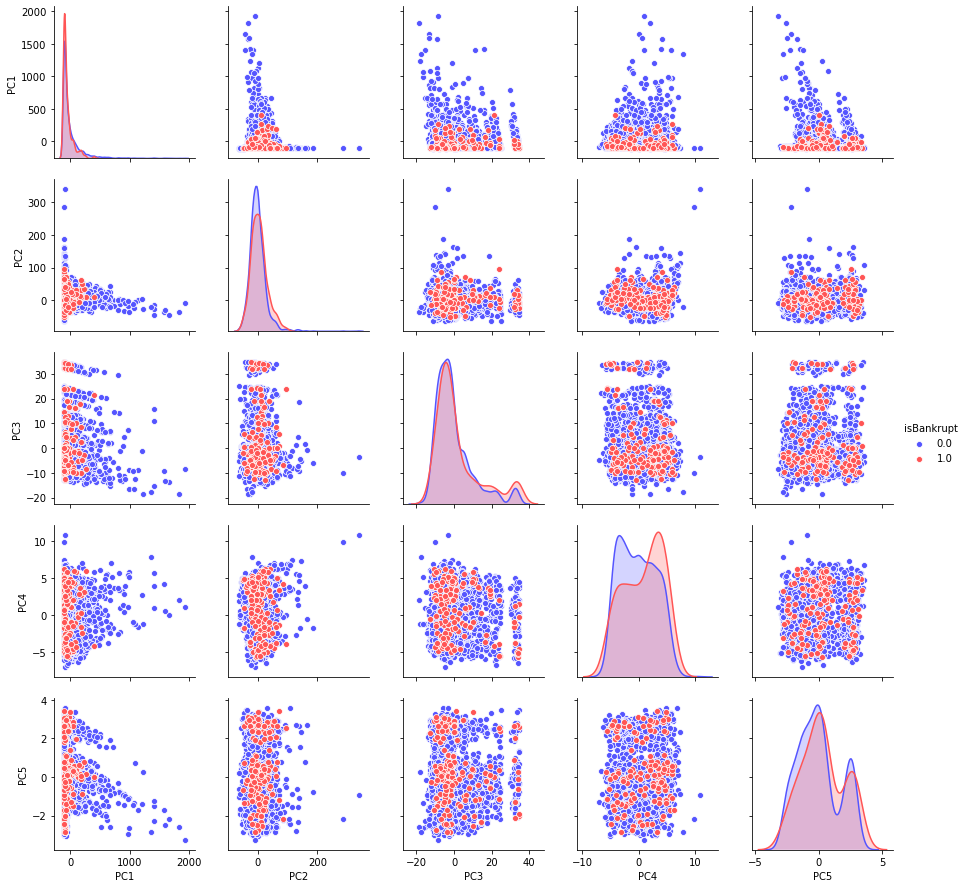

In [81]:
sns.pairplot(PC_df, hue='isBankrupt', vars=['PC'+str(i+1) for i in range(numPC)], palette='seismic');

## Hierarchical clustering

In [83]:
from scipy.cluster import hierarchy